# **TikTok Project**
**Course 6 - The Nuts and bolts of machine learning**

Recall that you are a data professional at TikTok. Your supervisor was impressed with the work you have done and has requested that you build a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

A notebook was structured and prepared to help you in this project. A notebook was structured and prepared to help you in this project. Please complete the following questions.

# **Course 6 End-of-course project: Classifying videos using machine learning**

In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.
<br/>

**The purpose** of this model is to increase response time and system efficiency by automating the initial stages of the claims process.

**The goal** of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".
<br/>

*This activity has three parts:*

**Part 1:** Ethical considerations
* Consider the ethical implications of the request

* Should the objective of the model be adjusted?

**Part 2:** Feature engineering

* Perform feature selection, extraction, and transformation to prepare the data for modeling

**Part 3:** Modeling

* Build the models, evaluate them, and advise on next steps

Follow the instructions and answer the questions below to complete the activity. Then, you will complete an Executive Summary using the questions listed on the PACE Strategy Document.

Be sure to complete this activity before moving on. The next course item will provide you with a completed exemplar to compare to your own work.



# **Classify videos using machine learning**

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## **PACE: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following questions:


1.   **What are you being asked to do? What metric should I use to evaluate success of my business/organizational objective?**

2.   **What are the ethical implications of the model? What are the consequences of your model making errors?**
  *   What is the likely effect of the model when it predicts a false negative (i.e., when the model says a video does not contain a claim and it actually does)?

  *   What is the likely effect of the model when it predicts a false positive (i.e., when the model says a video does contain a claim and it actually does not)?

3.   **How would you proceed?**


**1. What are you being asked to do?**  
Stakeholders at TikTok has asked us to create a machine learning model to determine if videos violate terms of service. Since there could be thousands or millions of videos created each day, manually reviewing such videos would be too resource intense.

Our previous analysis indicated that TikTok users who have been banned (violated term of service) are more likely to post a `claim` than an `opinion`.

We are asked to build a model that determines if a video is a `claim` or `opinion`. If a video is flagged as `claim`, it would go into further processing. We could use the top X percentage of times a video was reported as a way to determine if it needs to be manually reviewed sooner rather than later.

**What metric should I use to evaluate success of my business/organizational objective?**  
The dataset that we will be working on has a binary variable column named `claim_status` which is either `claim` or `opinion`. We will use `claim_status` as the target variable. This will be a classification task since the model is predicting a binary class.

We will use F1, precision, recall and accuracy scores to evaluate the success of the model. A confusion matrix will be created to show:
- True Positives: the model predicted a `claim` and it truly was a `claim`
- True Negatives: the model predicted an `opinion` and it truly was an `opinion`
- False Positives: the model predicted a `claim` when it was an `opinion`
- False Negatives: the model predicted an `opinion` when it was a `claim`

**2. What are the ethical implications of the model?**  
If the model makes a prediction mistake, it's better to be a False Positive than False Negative. We want to catch videos that break the terms of service so predicting a False Negative means the video went through and not flagged for further processing. 

**What are the consequences of your model making errors?**  
If a video was a False Positive, then it would have been flagged for further processing. If a video was a False Negative, it would have gone through and violate terms of service. We want to minimize the latter.

Since it is more important to minimize False Negatives, we will use **recall** as our main evaluation metric.

**3. How would you proceed?**  
We will need to do the following on the dataset:
- load it
- perform exploratory data analysis, clean/modify/transform
- split the data into training, validating, and testing sets
- build, fit, and tune hyperparameters on training set
- run validation set on best model
- run test set and evaluate performance

### **Task 1. Imports and data loading**

Start by importing packages needed to build machine learning models to achieve the goal of this project.

In [1]:
# Import packages for data manipulation
import numpy as np
import pandas as pd

# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_importance

# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)

Now load the data from the provided csv file into a dataframe.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Load dataset into dataframe
data = pd.read_csv("tiktok_dataset.csv")

<img src="images/Analyze.png" width="100" height="100" align=left>

## **PACE: Analyze**

Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2: Examine data, summary info, and descriptive stats**

Inspect the first five rows of the dataframe.

In [3]:
# Display first few rows

data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Get the number of rows and columns in the dataset.

In [4]:
# Get number of rows and columns

data.shape

(19382, 12)

Get the data types of the columns.

In [5]:
# Get data types of columns

data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

Get basic information about the dataset.

In [6]:
# Get basic information

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


Generate basic descriptive statistics about the dataset.

In [7]:
# Generate basic descriptive stats

data.describe(include='all')

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,19084,1.938200e+04,19382.000000,19084,19382,19382,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
unique,NaN,2,NaN,NaN,19012,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,claim,NaN,NaN,a friend read in the media a claim that badmi...,not verified,active,NaN,NaN,NaN,NaN,NaN
freq,NaN,9608,NaN,NaN,2,18142,15663,NaN,NaN,NaN,NaN,NaN
mean,9691.500000,NaN,5.627454e+09,32.421732,NaN,NaN,NaN,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,NaN,2.536440e+09,16.229967,NaN,NaN,NaN,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,NaN,1.234959e+09,5.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,NaN,3.430417e+09,18.000000,NaN,NaN,NaN,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,NaN,5.618664e+09,32.000000,NaN,NaN,NaN,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,NaN,7.843960e+09,47.000000,NaN,NaN,NaN,504327.000000,125020.000000,18222.000000,1156.250000,292.000000


Check for and handle missing values.

In [8]:
# Find number of unique value(s) in each column

data.nunique()

#                           19382
claim_status                    2
video_id                    19382
video_duration_sec             56
video_transcription_text    19012
verified_status                 2
author_ban_status               3
video_view_count            15632
video_like_count            12224
video_share_count            9231
video_download_count         4336
video_comment_count          2424
dtype: int64

In [9]:
# Print unique values from each column

for col in data:
    print(col)
    print(data[col].unique())
#    print(sorted(data[col].unique()))
    print()

# Another way to display unique values from each column, but in condensed format
#data.apply(np.unique)

#
[    1     2     3 ... 19380 19381 19382]

claim_status
['claim' 'opinion' nan]

video_id
[7017666017 4014381136 9859838091 ... 2565539685 2969178540 8132759688]

video_duration_sec
[59 32 31 25 19 35 16 41 50 45 47 30 51 20 42 10 11 27 34 52 54 39 33 22
 21 48 55 23 12 29 46  5 17 18 36 53 40 49 13 56 37 44 26 43  7  8 28 24
 57  9 60 58 38 15  6 14]

video_transcription_text
['someone shared with me that drone deliveries are already happening and will become common by 2025'
 'someone shared with me that there are more microorganisms in one teaspoon of soil than people on the planet'
 'someone shared with me that american industrialist andrew carnegie had a net worth of $475 million usd, worth over $300 billion usd today'
 ...
 'in our opinion lightning strikes somewhere on earth about 100 times every second'
 'in our opinion a pineapple plant can only produce one pineapple a year'
 nan]

verified_status
['not verified' 'verified']

author_ban_status
['under review' 'active' 'banned

In [10]:
# Check for missing values

print('Number of rows with missing data: ', data.isna().any(axis=1).sum(), sep='')
print()
print('Number of missing data in each column:')
print(data.isna().sum(axis=0))
print()
print('Row(s) with missing data:')
print(data[data.isna().any(axis=1)])

Number of rows with missing data: 298

Number of missing data in each column:
#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

Row(s) with missing data:
           # claim_status    video_id  video_duration_sec  \
19084  19085          NaN  4380513697                  39   
19085  19086          NaN  8352130892                  60   
19086  19087          NaN  4443076562                  25   
19087  19088          NaN  8328300333                   7   
19088  19089          NaN  3968729520                   8   
...      ...          ...         ...                 ...   
19377  19378          NaN  7578226840                  21   
19378  193

The number of rows with missing data is negligible compared to the dataset, thus dropping them is okay.

In [11]:
# Drop rows with missing values

data_subset = data.dropna(axis=0).reset_index(drop=True)

In [12]:
# Display first few rows after handling missing values

data_subset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


Check for and handle duplicates.

In [13]:
# Check for duplicates

print('Number duplicated data: ', data_subset.duplicated().sum(), sep='')

Number duplicated data: 0


Check for and handle outliers.

In [14]:
# Tree models do not require handling of outliers


Check class balance.

In [15]:
# Check class balance

data_subset['claim_status'].value_counts()

claim_status
claim      9608
opinion    9476
Name: count, dtype: int64

In [16]:
# Check class balance by proportion

data_subset['claim_status'].value_counts(normalize=True)

claim_status
claim      0.503458
opinion    0.496542
Name: proportion, dtype: float64

The `claim_status` class proprotion very balanced at 50.3% `claim` and 49.7% `opinion`.

<img src="images/Construct.png" width="100" height="100" align=left>

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 3: Feature engineering**

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [17]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe

data_subset['video_transcription_text_length'] = data_subset['video_transcription_text'].str.len()

data_subset.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,128


Calculate the average text_length for claims and opinions.

In [18]:
# Calculate the average text_length for claims and opinions
data_subset[['claim_status', 'video_transcription_text_length']].groupby(by=['claim_status']).mean()

,video_transcription_text_length
claim_status,
claim,95.376978
opinion,82.722562


Visualize the distribution of `text_length` for claims and opinions.

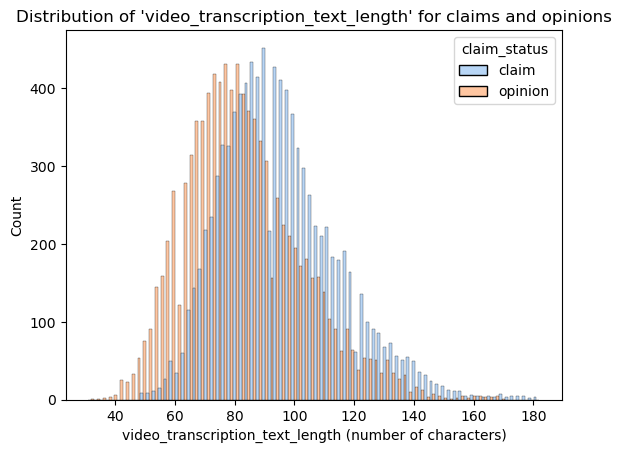

In [19]:
# Visualize the distribution of `text_length` for claims and opinions
# Create two histograms in one plot

sns.histplot(data=data_subset, stat='count', multiple='dodge',
             x='video_transcription_text_length', kde=False, palette='pastel', 
             hue='claim_status', element='bars', legend=True)

plt.title('Distribution of \'video_transcription_text_length\' for claims and opinions')
plt.xlabel('video_transcription_text_length (number of characters)')
plt.ylabel('Count')

plt.show()

The `video_transcription_text_length` for `claim` is on average more than `opinion` videos. The distribution for both are normal with some skew to the right.

**Feature selection and transformation**

Encode target and catgorical variables.

In [20]:
# Create a copy of the X data
X = data_subset.copy()

# Drop unnecessary columns
X = X.drop(['#', 'video_id', 'video_transcription_text'], axis=1)

# Encode target variable
X['claim_status'] = X['claim_status'].map({'opinion':0, 'claim': 1})

# Dummy encode remaining categorical values
X = pd.get_dummies(X, drop_first=True, columns=['verified_status', 'author_ban_status'])

X.head()

,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,1,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,1,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,1,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


### **Task 4: Split the data**

Assign target variable.

In [21]:
# Isolate target variable

y = X['claim_status']

Isolate the features.

In [22]:
# Isolate features
X = X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,video_transcription_text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296.0,19425.0,241.0,1.0,0.0,97,False,False,True
1,32,140877.0,77355.0,19034.0,1161.0,684.0,107,False,False,False
2,31,902185.0,97690.0,2858.0,833.0,329.0,137,False,False,False
3,25,437506.0,239954.0,34812.0,1234.0,584.0,131,False,False,False
4,19,56167.0,34987.0,4110.0,547.0,152.0,128,False,False,False


#### **Task 5: Create train/validate/test sets**

Split data into training and testing sets, 80/20.

In [23]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validate/test sets.

In [24]:
# Split the training data into training and validation sets

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [25]:
# Get shape of each training, validation, and testing set

X_tr.shape, X_val.shape, X_test.shape, y_tr.shape, y_val.shape, y_test.shape, 

((11450, 10), (3817, 10), (3817, 10), (11450,), (3817,), (3817,))

The split function placed the correct number of data in each set. There are 10 columns with 11,450 rows of data in the training set, 3,817 rows in the validation set, and 3,817 rows in the testing set.

### **Task 6. Build models**


### **Build a random forest model**

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [26]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1, 2],
             'min_samples_split': [2, 3],
             'n_estimators': [75, 100, 200],
             }

# Define a dictionary of scoring metrics to capture
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [27]:
%%time
# Fit model with training set

rf_cv.fit(X_tr, y_tr)

CPU times: user 4min 55s, sys: 521 ms, total: 4min 55s
Wall time: 4min 55s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring={'recall', 'f1', 'precision', 'accuracy'})

In [28]:
# Examine best recall score

rf_cv.best_score_

0.9908534395531852

In [29]:
# Examine best parameters

rf_cv.best_params_

{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

In [30]:
def make_results(model_name, model_object):
    '''
    Accepts as arguments a model name (your choice - string) and
    a fit GridSearchCV model object.
  
    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean F1 score across all validation folds.  
    '''

    # Get all the results from the CV and put them in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolate the row of the df with the max(mean f1 score)
    best_estimator_results = cv_results.iloc[cv_results['mean_test_f1'].idxmax(), :]

    # Extract accuracy, precision, recall, and f1 score from that row
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Create table of results
    table = pd.DataFrame({'Model': [model_name],
                          'F1': [f1],
                          'Recall': [recall],
                          'Precision': [precision],
                          'Accuracy': [accuracy]
                         }
                        )
  
    return table

In [31]:
# Get all the results from the CV and put them in a df
# Isolate the row of the df with the max(mean precision score)

rf_cv_results = make_results('Random Forest Tuned', rf_cv)

rf_cv_results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Tuned,0.995143,0.990853,0.999479,0.995109


**Question:** How well is your model performing? Consider average recall score and precision score.  
The recall score is 0.990853 or 99.1% across 5 cross validation folds. The precision is 0.999479. This model is predicting `claim` really well.

### **Build an XGBoost model**

In [32]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params_xgb = {'max_depth': [4, 8, 12],
                 'min_child_weight': [3, 5],
                 'learning_rate': [0.01, 0.1],
                 'n_estimators': [300, 500]
                 }

# Define a dictionary of scoring metrics to capture
scoring_xgb = {'accuracy', 'precision', 'recall', 'f1'}

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params_xgb, scoring=scoring_xgb, cv=5, refit='recall')

In [33]:
%%time
# Fit model with training set

xgb_cv.fit(X_tr, y_tr)

CPU times: user 6min 2s, sys: 1.96 s, total: 6min 4s
Wall time: 3min 6s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring={'recall', 'f1', 'precision', 'accuracy'})

In [34]:
# Examine best recall score

xgb_cv.best_score_

0.9906808769992594

In [35]:
# Examine best parameters

xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 300}

In [36]:
# Get all the results from the CV and put them in a df
# Isolate the row of the df with the max(mean precision score)

xgb_cv_results = make_results('XGBoost Tuned', xgb_cv)

xgb_cv_results

,Model,F1,Recall,Precision,Accuracy
0,XGBoost Tuned,0.995142,0.990681,0.999652,0.995109


In [37]:
results = pd.concat([xgb_cv_results, rf_cv_results]).sort_values(by=['Recall'], ascending=False).reset_index(drop=True)

results

,Model,F1,Recall,Precision,Accuracy
0,Random Forest Tuned,0.995143,0.990853,0.999479,0.995109
1,XGBoost Tuned,0.995142,0.990681,0.999652,0.995109


**Question:** How well does your model perform? Consider recall score and precision score.  
The recall score is 0.990681, which is not as good as Random Forest Tuned.  However, the precision score is higher at 0.999652.

<img src="images/Execute.png" width="100" height="100" align=left>

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 7. Evaluate model**

Evaluate models against validation criteria.

#### **Random forest**

In [38]:
# Use the random forest "best estimator" model to get predictions on the encoded testing set
y_pred_rf = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the encoded testing set.

In [39]:
# Display the predictions on the encoded testing set
y_pred_rf

array([1, 0, 1, ..., 1, 1, 1])

Display the true labels of the testing set.

In [40]:
# Display the true labels of the testing set
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualize the results of the classification model.

In [41]:
# Create helper function to plot confusion matrix
def conf_matrix_plot(model, x_data, y_data, model_name):
    '''
    Accepts as argument model object, X data (test or validate), y data (test or validate) and model name. 
    Returns a plot of confusion matrix for predictions on y data.
    ''' 
    model_pred = model.predict(x_data)
    cm = confusion_matrix(y_data, model_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=model.classes_)
  
    disp.plot(values_format='')
    plt.title(str(model_name) + ' - validation set');
    plt.show()

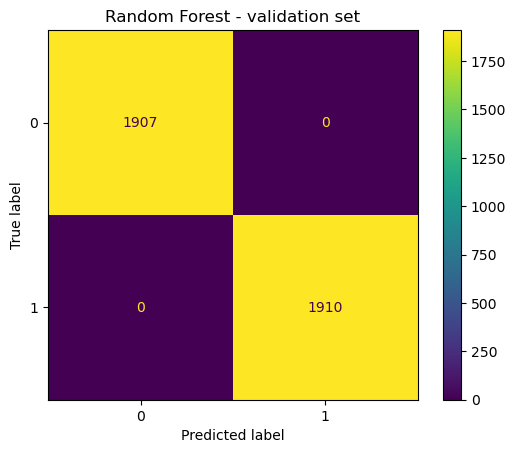

In [133]:
# Display confusion matrix plot

conf_matrix_plot(rf_cv, X_val, y_pred_rf, 'Random Forest')

- The upper-left quadrant displays the number of True Negatives: the number of opinions that the model accurately classified as so.

- The upper-right quadrant displays the number of False Positives: the number of opinions that the model misclassified as claims.

- The lower-left quadrant displays the number of False Negatives: the number of claims that the model misclassified as opinions.

- The lower-right quadrant displays the number of True Positives: the number of claims that the model accurately classified as so.

The model does not produce any False Negatives, which is what we want to minimize.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

In [137]:
# Create a classification report
# Create classification report for random forest model

target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred_rf, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?  
The Random Forest model is almost perfect. The confusion matrix indicates that were no misclassifications (0 FN and 0 FP).

#### **XGBoost**

In [125]:
#Evaluate XGBoost model

y_pred_xgb = xgb_cv.best_estimator_.predict(X_val)

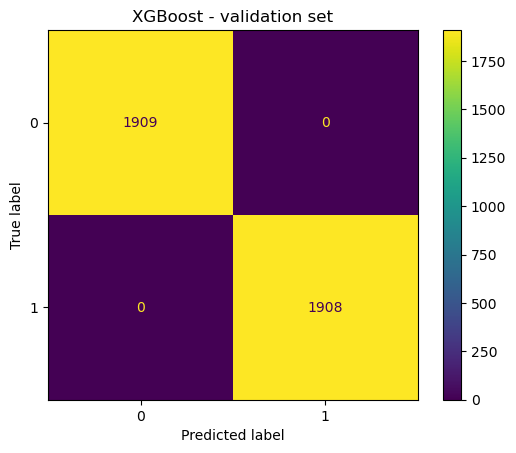

In [134]:
# Display confusion matrix plot

conf_matrix_plot(xgb_cv, X_val, y_pred_xgb, 'XGBoost')

In [138]:
# Create a classification report
# target_labels defined in Random Forest classification_report() cell

print(classification_report(y_val, y_pred_xgb, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?  
The XGBoost model is also almost perfect with a recall score of 0.99.

The Random Forest model had a higher recall score when comparing more decimal places so that is the champion model.

### **Use champion model to predict on test data**

In [140]:
# Random Forest is the champion model so we will use that on the test data

y_pred_final_rf = rf_cv.best_estimator_.predict(X_test)

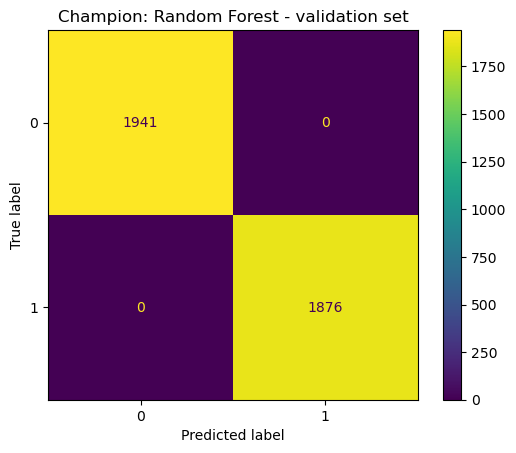

In [141]:
# Display confusion matrix plot

conf_matrix_plot(rf_cv, X_test, y_pred_final_rf, 'Champion: Random Forest')

#### **Feature importances of champion model**

In [143]:
# If the champion model was XGBoost, we can use the code below to print feature importances

# Plot the relative feature importance of the predictor variables in your model.

##plot_importance(xgb_cv.best_estimator_)

#ax = plot_importance(rf_cv.best_estimator_)
#fig = ax.figure
#fig.set_size_inches(10, 8)

In [150]:
def forest_importances_plot(model, x_data):
    '''
    Accepts as argument model object, X data (test or validate). 
    Returns a plot of forest_importances.
    ''' 
    
    importances = model.feature_importances_

    forest_importances = pd.Series(importances, index=x_data.columns).sort_values(ascending=False)

    fig, ax = plt.subplots()
    ax.set_title('Feature Importances')
    ax.set_ylabel('Mean decrease in impurity')
    forest_importances.plot.bar(ax=ax);

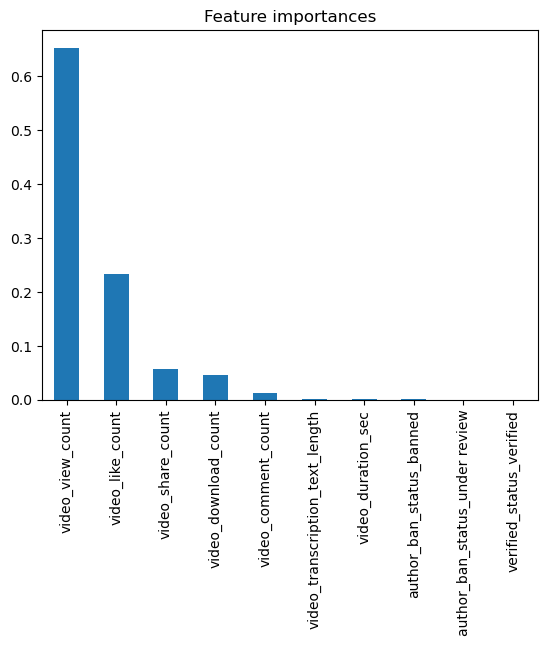

In [149]:
# Plot and display `feature_importances_` attribute relative to each feature

forest_importances_plot(rf_cv.best_estimator_, X)

**Question:** Describe your most predictive features. Were your results surprising?  
The by far most predictive feature is `video_view_count`. Other features of note are `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`. All these relate to engagement levels as found in prior exploratory data analysis so the results were not surprising.

### **Task 8. Conclusion**

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.


**1. Would you recommend using this model? Why or why not?**  
Yes, I would recommend the champion model, Random Forest, because it performed well on both the validating and testing data. The F1, precision, recall, and accuracy scores were all nearly perfect.

**2. What was your model doing? Can you explain how it was making predictions?**  
The Random Forest model's predictions were mostly based on engagement features like `video_view_count`, `video_like_count`, `video_share_count`, `video_download_count`, and `video_comment_count`. The higher the counts were for those variables, the more likely they were predicted as `claim` videos.

**3. Are there new features that you can engineer that might improve model performance?**
I can go back and try tuning the hyperparameters with numbers range that is close to the best parameters. This process might make an improvement but the model is already at 99%.

**4. What features would you want to have that would likely improve the performance of your model?**
The number of times a video was reported should help improve the model. The number of videos from the author who was reported and the total amount of reports could also help improve performance.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.